In [ ]:
import torch

x = torch.arange(12, dtype=torch.float32)
x
x.numel()
x.shape

torch.Size([12])

1D Tensor Visualizer

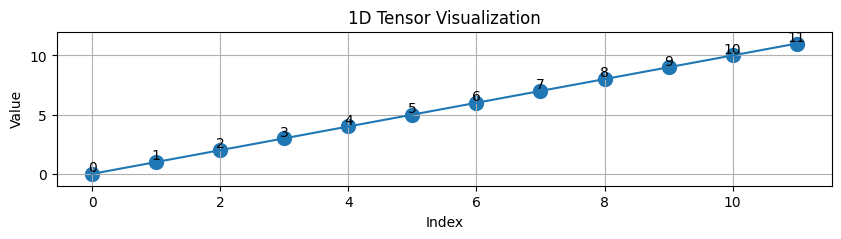

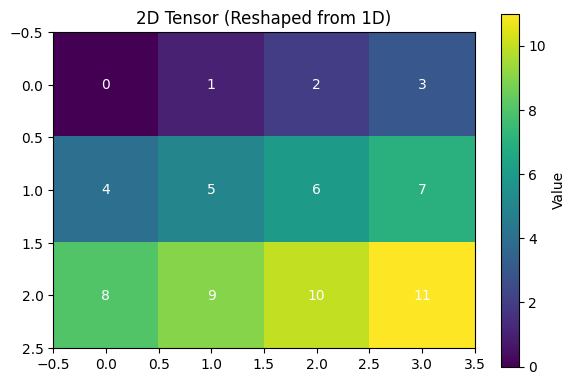

In [5]:
# Visualize the 1D tensor
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(10, 2))

# Plot the 1D tensor as points on a line
plt.scatter(range(len(x)), x.numpy(), s=100)

# Connect the points with a line
plt.plot(range(len(x)), x.numpy(), '-')

# Add labels for each point
for i, val in enumerate(x.numpy()):
    plt.text(i, val + 0.2, f"{val:.0f}", ha='center')

# Add axis labels
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('1D Tensor Visualization')

# Set the y-axis limits to show all points clearly
plt.ylim(-1, 12)

# Show the plot
plt.grid(True)
plt.show()

# Now visualize the 2D tensor (reshaped)
X = x.reshape(3, 4)
plt.figure(figsize=(6, 4))
plt.imshow(X.numpy(), cmap='viridis')
plt.colorbar(label='Value')
plt.title('2D Tensor (Reshaped from 1D)')

# Add value labels to each cell
for i in range(3):
    for j in range(4):
        plt.text(j, i, f"{X[i, j]:.0f}", ha='center', va='center', color='white')

plt.tight_layout()
plt.show()

Let's create a 3D visualization of the 1D tensor as vectors in space

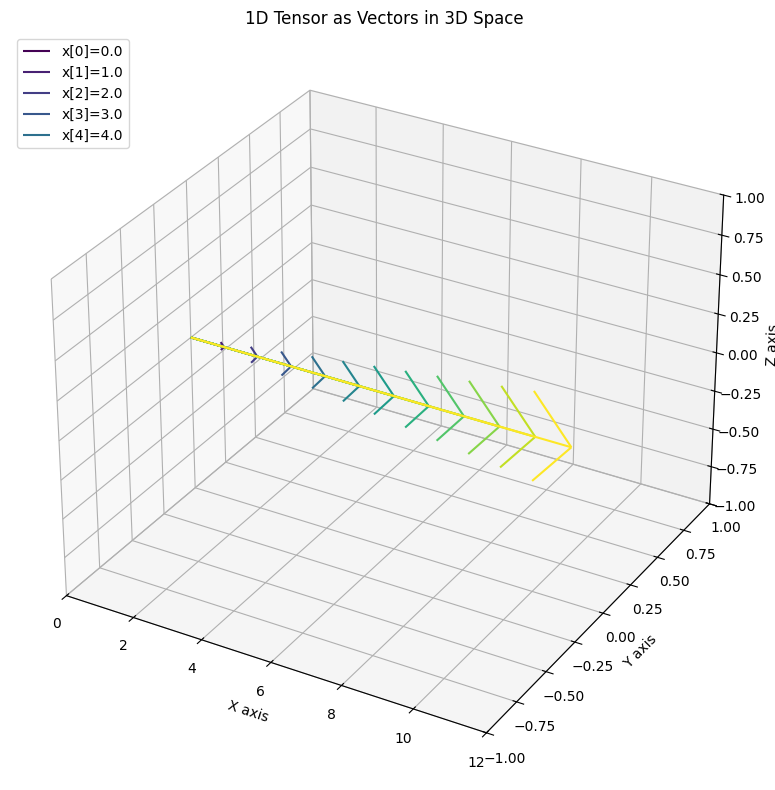

In [6]:
# Visualize the 1D tensor as vectors in 3D space
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Origin point
origin = np.zeros(3)

# Create vectors along the x-axis to represent the 1D tensor
for i, val in enumerate(x):
    # Create a vector that points in the x direction with magnitude equal to the tensor value
    vector = np.zeros(3)
    vector[0] = val.item()  # Use x-axis for the 1D representation
    
    # Plot the vector as an arrow from origin
    ax.quiver(origin[0], origin[1], origin[2], 
              vector[0], vector[1], vector[2],
              color=plt.cm.viridis(val.item()/11),
              arrow_length_ratio=0.1,
              label=f'x[{i}]={val.item()}')

# Set labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('1D Tensor as Vectors in 3D Space')

# Set axis limits
max_val = x.max().item()
ax.set_xlim([0, max_val + 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# Add a legend for the first few vectors to avoid overcrowding
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], loc='upper left')

plt.tight_layout()
plt.show()

A tensor shape is the lenght along each axis.

In [4]:
X = x.reshape(3, 4)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

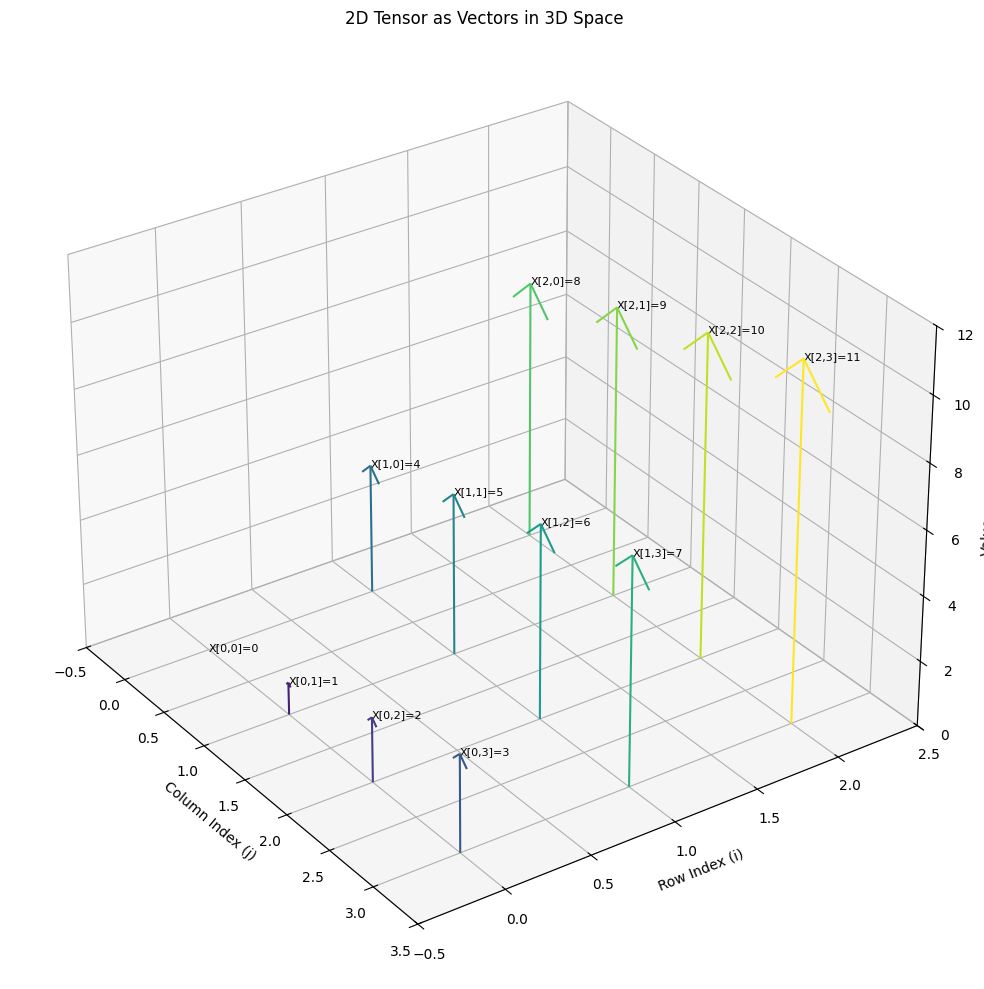

In [7]:
# Visualize the 2D tensor (reshaped) as vectors in 3D space
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Origin point
origin = np.zeros(3)

# Create a meshgrid for the 2D tensor positions
y_pos, x_pos = np.meshgrid(range(X.shape[1]), range(X.shape[0]))
x_pos = x_pos.flatten()
y_pos = y_pos.flatten()

# Plot each element of the 2D tensor as a vector in 3D space
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        # Position in 3D space (x,y plane with z=0)
        pos = np.array([j, i, 0])
        
        # Vector pointing in z direction with magnitude equal to tensor value
        vector = np.array([0, 0, X[i, j].item()])
        
        # Plot the vector
        ax.quiver(pos[0], pos[1], pos[2],
                  vector[0], vector[1], vector[2],
                  color=plt.cm.viridis(X[i, j].item()/11),
                  arrow_length_ratio=0.1)
        
        # Add text label
        ax.text(j, i, X[i, j].item(), 
                f'X[{i},{j}]={X[i, j].item():.0f}', 
                size=8, zorder=1, color='k')

# Set labels and title
ax.set_xlabel('Column Index (j)')
ax.set_ylabel('Row Index (i)')
ax.set_zlabel('Value')
ax.set_title('2D Tensor as Vectors in 3D Space')

# Set axis limits
ax.set_xlim([-0.5, X.shape[1]-0.5])
ax.set_ylim([-0.5, X.shape[0]-0.5])
ax.set_zlim([0, X.max().item()+1])

# Adjust view angle
ax.view_init(elev=30, azim=-35)

plt.tight_layout()
plt.show()